In [1]:
# Importing the libraries (Banking Marketing dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Universal Bank Marketing Campaign (BMC) data

BMCdata = pd.read_csv(r"D:\iiit notes\Internship\13 seasion 27_May-2021\bank-additional-full-V1.0.csv", header=0)
BMCdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Display the dataset information 

BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
BMCdata.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
Deposit              2
dtype: int64

In [5]:
# Replace target variable 'Deposit', 'Yes' to 1 and 'No' to 0 and # convert the 'y' to inte

BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('yes', '1')
BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('no', '0')
BMCdata['Deposit'] = BMCdata['Deposit'].astype(int)

In [6]:
# Count the target or dependent variable by '0' & '1' and
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

BMCdata_count = BMCdata.Deposit.value_counts()
print('Class 0:', BMCdata_count[0])
print('Class 1:', BMCdata_count[1])
print('Proportion:', round(BMCdata_count[0] / BMCdata_count[1], 2), ': 1')
print('Total CC Trans:', len(BMCdata))

Class 0: 36548
Class 1: 4640
Proportion: 7.88 : 1
Total CC Trans: 41188


In [7]:
# Displaying Duplicate values with in dataset
BMCdata_dup = BMCdata[BMCdata.duplicated(keep='last')]
BMCdata_dup


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [8]:
# Remove the identified duplicate records
BMCdata = BMCdata.drop_duplicates()
BMCdata.shape


(41176, 21)

In [9]:
BMCdata = BMCdata.reset_index(drop=True)

In [10]:
BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [11]:
for i in BMCdata.columns:
 print(BMCdata[i].value_counts())

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
no         33938
yes   

In [12]:
BMCdata['housing'].value_counts()


yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [13]:
# Replace target variable 'housing', and convert the 'housing' to integer value.
BMCdata['housing'] = BMCdata['housing'].str.replace('yes', '1')
BMCdata['housing'] = BMCdata['housing'].str.replace('no', '0')
BMCdata['housing'] = BMCdata['housing'].str.replace('unk0wn', '0')
BMCdata['housing'] = BMCdata['housing'].astype(int)


In [14]:
BMCdata['housing'].value_counts(sort=False)


0    19605
1    21571
Name: housing, dtype: int64

In [15]:
BMCdata['loan'].value_counts()


no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [16]:
# Replace target variable 'loan', andconvert the 'loan' to integer value.
BMCdata['loan'] = BMCdata['loan'].str.replace('yes', '1')
BMCdata['loan'] = BMCdata['loan'].str.replace('no', '0')
BMCdata['loan'] = BMCdata['loan'].str.replace('unk0wn', '0')
BMCdata['loan'] = BMCdata['loan'].astype(int)

In [17]:
BMCdata['loan'].value_counts(sort=False)

0    34928
1     6248
Name: loan, dtype: int64

In [18]:
BMCdata['job'].value_counts()


admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
del BMCdata['job']

In [20]:
BMCdata['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [21]:
# Replace the variable 'education', convert the 'education' to integer value.
BMCdata['education'] = BMCdata['education'].str.replace('illiterate', '1')
BMCdata['education'] = BMCdata['education'].str.replace('unknown', '1')
BMCdata['education'] = BMCdata['education'].str.replace('basic.4y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.6y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.9y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('high.school', '3')
BMCdata['education'] = BMCdata['education'].str.replace('professional.course', '4')
BMCdata['education'] = BMCdata['education'].str.replace('university.degree', '5')
BMCdata['education'] = BMCdata['education'].astype(int)


In [22]:
BMCdata['education'].value_counts(sort=False)

1     1748
2    12512
3     9512
4     5240
5    12164
Name: education, dtype: int64

In [23]:
BMCdata.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
education,2,3,3,2,3
default,no,unknown,no,no,no
housing,0,0,1,0,0
loan,0,0,0,0,1
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon
duration,261,149,226,151,307


In [24]:
BMCdata['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [25]:
# Replace variable 'marital', and convert the 'marital' to integer value.
BMCdata['marital'] = BMCdata['marital'].str.replace('single', '1')
BMCdata['marital'] = BMCdata['marital'].str.replace('married', '2')
BMCdata['marital'] = BMCdata['marital'].str.replace('divorced', '3')
BMCdata['marital'] = BMCdata['marital'].str.replace('unknown', '1')
BMCdata['marital'] = BMCdata['marital'].astype(int)


In [26]:
BMCdata['marital'].value_counts(sort=False)


1    11644
2    24921
3     4611
Name: marital, dtype: int64

In [27]:
BMCdata['default'].value_counts(sort=False)


unknown     8596
no         32577
yes            3
Name: default, dtype: int64

In [28]:
# Replace variable 'default', and convert the 'default' to integer value.
BMCdata['default'] = BMCdata['default'].str.replace('yes', '1')
BMCdata['default'] = BMCdata['default'].str.replace('no', '0')
BMCdata['default'] = BMCdata['default'].str.replace('unk0wn', '2')
BMCdata['default'] = BMCdata['default'].astype(int)


In [29]:
BMCdata['default'].value_counts(sort=False)

0    32577
1        3
2     8596
Name: default, dtype: int64

In [30]:
del BMCdata['default']

In [31]:
BMCdata['contact'].value_counts(sort=False)

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [32]:
# Replace variable 'contact', and convert the 'contact' to integer value.
BMCdata['contact'] = BMCdata['contact'].str.replace('telephone', '1')
BMCdata['contact'] = BMCdata['contact'].str.replace('cellular', '2')
BMCdata['contact'] = BMCdata['contact'].astype(int)


In [33]:
BMCdata['contact'].value_counts(sort=False)

1    15041
2    26135
Name: contact, dtype: int64

In [34]:
BMCdata['day_of_week'].value_counts()


thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [35]:
# Replace variable 'day_of_week', and convert the 'day_of_week' to integer value.
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('mon', '1')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('tue', '2')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('wed', '3')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('thu', '4')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('fri', '5')
BMCdata['day_of_week'] = BMCdata['day_of_week'].astype(int)

In [36]:
BMCdata['day_of_week'].value_counts(sort=False)


1    8512
2    8086
3    8134
4    8618
5    7826
Name: day_of_week, dtype: int64

In [37]:
BMCdata['month'].value_counts()


may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [38]:
# Replace variable 'month', and convert the 'month' to integer value.
BMCdata['month'] = BMCdata['month'].str.replace('mar', '3')
BMCdata['month'] = BMCdata['month'].str.replace('apr', '4')
BMCdata['month'] = BMCdata['month'].str.replace('may', '5')
BMCdata['month'] = BMCdata['month'].str.replace('jun', '6')
BMCdata['month'] = BMCdata['month'].str.replace('jul', '7')
BMCdata['month'] = BMCdata['month'].str.replace('aug', '8')
BMCdata['month'] = BMCdata['month'].str.replace('sep', '9')
BMCdata['month'] = BMCdata['month'].str.replace('oct', '10')
BMCdata['month'] = BMCdata['month'].str.replace('nov', '11')
BMCdata['month'] = BMCdata['month'].str.replace('dec', '12')
BMCdata['month'] = BMCdata['month'].astype(int)

In [39]:
BMCdata['month'].value_counts(sort=False)


3       546
4      2631
5     13767
6      5318
7      7169
8      6176
9       570
10      717
11     4100
12      182
Name: month, dtype: int64

In [40]:
BMCdata['poutcome'].value_counts()


nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [41]:
# Replace variable 'poutcome', and convert the 'poutcome' to integer value.
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('nonexistent', '0')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('failure', '1')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('success', '2')
BMCdata['poutcome'] = BMCdata['poutcome'].astype(int)


In [42]:
BMCdata['poutcome'].value_counts(sort=False)

0    35551
1     4252
2     1373
Name: poutcome, dtype: int64

In [43]:
BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   marital         41176 non-null  int32  
 2   education       41176 non-null  int32  
 3   housing         41176 non-null  int32  
 4   loan            41176 non-null  int32  
 5   contact         41176 non-null  int32  
 6   month           41176 non-null  int32  
 7   day_of_week     41176 non-null  int32  
 8   duration        41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  pdays           41176 non-null  int64  
 11  previous        41176 non-null  int64  
 12  poutcome        41176 non-null  int32  
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null 

In [44]:
del BMCdata['poutcome']

In [45]:
BMCdata.head()

,age,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,2,2,0,0,1,5,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,3,0,0,1,5,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,3,1,0,1,5,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,2,0,0,1,5,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,3,0,1,1,5,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [46]:
BMCdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
marital,41176.0,1.829197,0.604652,1.000,1.000,2.000,2.000,3.000
education,41176.0,3.329318,1.293902,1.000,2.000,3.000,5.000,5.000
housing,41176.0,0.523873,0.499436,0.000,0.000,1.000,1.000,1.000
loan,41176.0,0.151739,0.358772,0.000,0.000,0.000,0.000,1.000
contact,41176.0,1.634714,0.481516,1.000,1.000,2.000,2.000,2.000
month,41176.0,6.607733,2.041013,3.000,5.000,6.000,8.000,12.000
day_of_week,41176.0,2.979600,1.411539,1.000,2.000,3.000,4.000,5.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000


In [47]:
BMCdata.corr()


,age,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
age,1.000000,0.392649,-0.120075,-0.001290,-0.007189,-0.006917,0.077098,-0.018443,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
marital,0.392649,1.000000,-0.098061,-0.011388,-0.006473,-0.054725,0.018384,-0.014668,-0.009676,0.007958,0.037785,-0.038319,0.084114,0.057255,0.033838,0.091956,0.086311,-0.046195
education,-0.120075,-0.098061,1.000000,0.020718,0.014043,0.119410,0.139336,-0.004008,-0.016510,0.000072,-0.035668,0.024192,-0.041404,-0.100733,0.072666,-0.031670,-0.029190,0.047865
housing,-0.001290,-0.011388,0.020718,1.000000,0.056634,0.084384,0.033394,-0.009369,-0.006830,-0.010861,-0.010709,0.020428,-0.059913,-0.081992,-0.034319,-0.058919,-0.045076,0.011804
loan,-0.007189,-0.006473,0.014043,0.056634,1.000000,0.013398,-0.001662,0.001844,0.000071,0.005251,-0.000062,-0.002187,0.001183,-0.005985,-0.013652,-0.000488,0.004212,-0.004478
contact,-0.006917,-0.054725,0.119410,0.084384,0.013398,1.000000,0.324394,-0.019540,0.026665,-0.077387,-0.117999,0.212903,-0.393730,-0.591596,-0.251575,-0.399892,-0.269285,0.144774
month,0.077098,0.018384,0.139336,0.033394,-0.001662,0.324394,1.000000,-0.006849,-0.019246,-0.030598,-0.079583,0.063792,0.058907,-0.150309,0.264139,0.163425,0.132719,0.037210
day_of_week,-0.018443,-0.014668,-0.004008,-0.009369,0.001844,-0.019540,-0.006849,1.000000,0.010527,0.015061,0.006769,0.004009,-0.004371,-0.004607,-0.000021,-0.005513,-0.000702,0.009993
duration,-0.000808,-0.009676,-0.016510,-0.006830,0.000071,0.026665,-0.019246,0.010527,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672,0.405297
campaign,0.004622,0.007958,0.000072,-0.010861,0.005251,-0.077387,-0.030598,0.015061,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361


In [48]:
# Identify the independt and dependent variables
from sklearn.model_selection import train_test_split
x = BMCdata.drop('Deposit', axis=1)
y = BMCdata['Deposit'] 

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Logistic Regression with random sampling

In [52]:
# To build the 'Logistic Regression' model with random sampling 

from sklearn.linear_model import LogisticRegression 
BMCdataLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0) 
BMCdataLR = BMCdataLR.fit(x_train,y_train)

In [53]:
# Predict the model with test data

y_pred = BMCdataLR.predict(x_test)

In [54]:
params1 = BMCdataLR.get_params()
print(params1)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [55]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None)
print('Confusion matrix: \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# Classification report for precision, rrecall f1-Score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3)

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+fn+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp+fp+fn)), 3)

# Mathews Correlation coefficient (MCC). Range of values of MCC lie between -1 to +1
# A Model with a score of +1 is perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

from sklearn.metrics import roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix: 
 [[  554   870]
 [  281 10648]]
Outcome Values : 
 554 870 281 10648
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.39      0.49      1424
           0       0.92      0.97      0.95     10929

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.89      0.91      0.90     12353

Accuracy : 90.7 %
Precision : 66.3 %
Recall : 38.9 %
F1 Score : 0.49
Balanced Accuracy : 68.2 %
MCC 0.462
roc_auc_score: 0.682


Feature: 0, Score: 0.00264
Feature: 1, Score: -0.05942
Feature: 2, Score: 0.05862
Feature: 3, Score: -0.00581
Feature: 4, Score: -0.03867
Feature: 5, Score: 0.52241
Feature: 6, Score: -0.03607
Feature: 7, Score: 0.00931
Feature: 8, Score: 0.00233
Feature: 9, Score: -0.01852
Feature: 10, Score: -0.00091
Feature: 11, Score: -0.16690
Feature: 12, Score: -0.42944
Feature: 13, Score: 0.46704
Feature: 14, Score: 0.02447
Feature: 15, Score: 0.21709
Feature: 16, Score: -0.00477


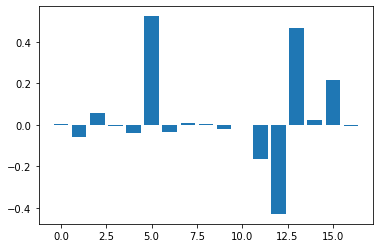

In [56]:
# To build the 'Logistic Regression' model with random sampling
# get importance
from matplotlib import pyplot
importance = BMCdataLR.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()